In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.size


8000

In [10]:
df.shape

(1000, 8)

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df['math score']=df['math score'].astype('float64')
df['reading score']=df['reading score'].astype('float64')
df['writing score']=df['writing score'].astype('float64')


In [14]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [16]:
Q1=df[['math score','reading score','writing score']].quantile(0.25)
Q3=df[['math score','reading score','writing score']].quantile(0.75)
IQR=1.5*(Q3-Q1)
lb=Q1-IQR
ub=Q3+IQR
outliers=df[((df[['math score','reading score','writing score']]<lb)) | ((df[['math score','reading score','writing score']]>ub))]
print(outliers)


    gender race/ethnicity parental level of education lunch  \
0      NaN            NaN                         NaN   NaN   
1      NaN            NaN                         NaN   NaN   
2      NaN            NaN                         NaN   NaN   
3      NaN            NaN                         NaN   NaN   
4      NaN            NaN                         NaN   NaN   
..     ...            ...                         ...   ...   
995    NaN            NaN                         NaN   NaN   
996    NaN            NaN                         NaN   NaN   
997    NaN            NaN                         NaN   NaN   
998    NaN            NaN                         NaN   NaN   
999    NaN            NaN                         NaN   NaN   

    test preparation course  math score  reading score  writing score  
0                       NaN         NaN            NaN            NaN  
1                       NaN         NaN            NaN            NaN  
2                       NaN

In [17]:
df = df[((df[['math score','reading score','writing score']]>lb)) | ((df[['math score','reading score','writing score']]<ub))]

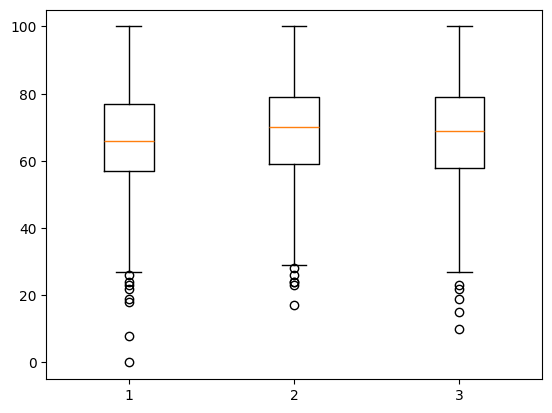

In [19]:
plt.boxplot(df[['math score','reading score','writing score']])
plt.show()

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,NaN,NaN,NaN,NaN,72.0,72.0,74.0
1,NaN,NaN,NaN,NaN,NaN,69.0,90.0,88.0
2,NaN,NaN,NaN,NaN,NaN,90.0,95.0,93.0
3,NaN,NaN,NaN,NaN,NaN,47.0,57.0,44.0
4,NaN,NaN,NaN,NaN,NaN,76.0,78.0,75.0


In [21]:
df_minmax=(df[['math score','reading score','writing score']]-df[['math score','reading score','writing score']].min())/(df[['math score','reading score','writing score']].max()-df[['math score','reading score','writing score']].min())

In [22]:
print(df_minmax)

     math score  reading score  writing score
0          0.72       0.662651       0.711111
1          0.69       0.879518       0.866667
2          0.90       0.939759       0.922222
3          0.47       0.481928       0.377778
4          0.76       0.734940       0.722222
..          ...            ...            ...
995        0.88       0.987952       0.944444
996        0.62       0.457831       0.500000
997        0.59       0.650602       0.611111
998        0.68       0.734940       0.744444
999        0.77       0.831325       0.844444

[1000 rows x 3 columns]


In [23]:
df_z=(df[['math score','reading score','writing score']]-df[['math score','reading score','writing score']].mean())/(df[['math score','reading score','writing score']].std())

In [24]:
print(df_z)

     math score  reading score  writing score
0      0.389828       0.193902       0.391296
1      0.191979       1.426762       1.312612
2      1.576922       1.769223       1.641653
3     -1.258913      -0.833482      -1.582952
4      0.653627       0.604855       0.457104
..          ...            ...            ...
995    1.445023       2.043192       1.773270
996   -0.269668      -0.970467      -0.859061
997   -0.467517       0.125409      -0.200978
998    0.126030       0.604855       0.588721
999    0.719577       1.152793       1.180995

[1000 rows x 3 columns]


-0.27893514909431694

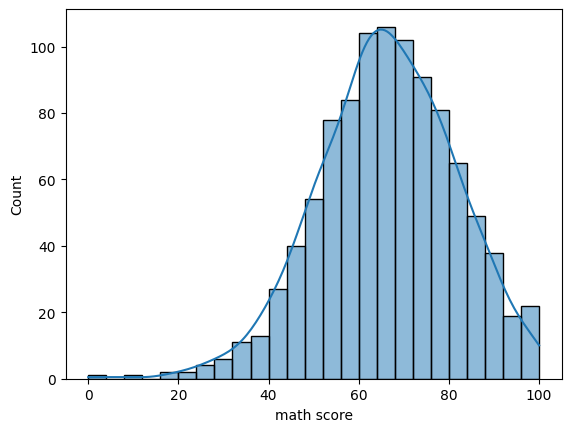

In [26]:
sns.histplot(df['math score'],kde=True)
df['math score'].skew()

-0.28944397150761897

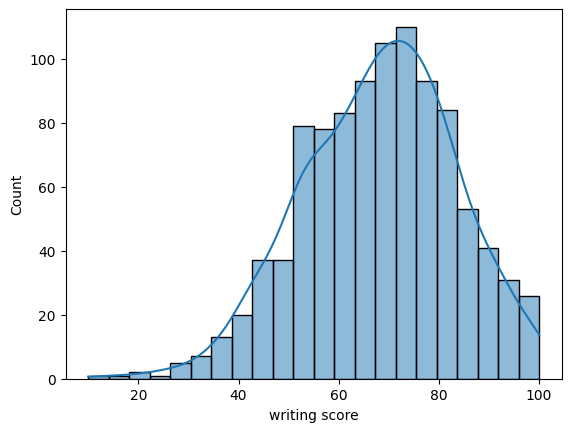

In [27]:
sns.histplot(df['writing score'],kde=True)
df['writing score'].skew()

-0.25910451810923063

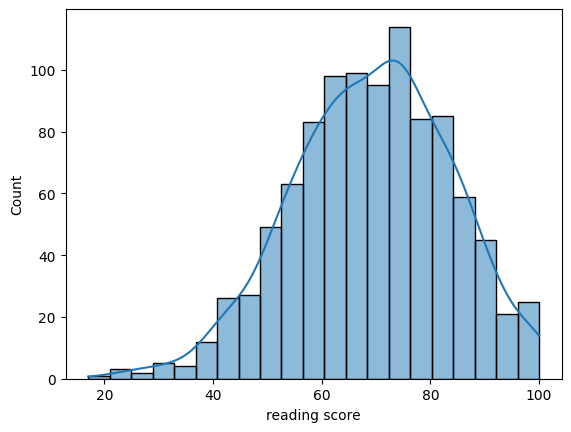

In [28]:
sns.histplot(df['reading score'],kde=True)
df['reading score'].skew()

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

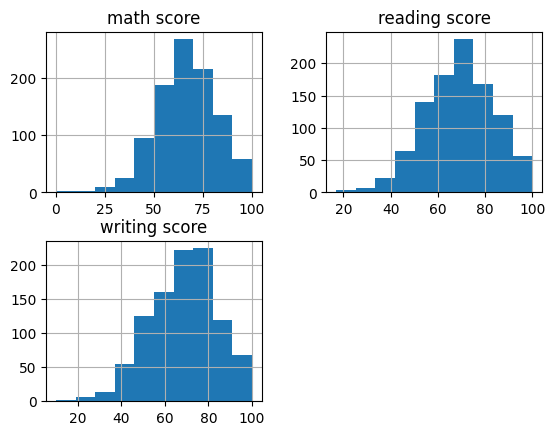

In [29]:
df.hist()

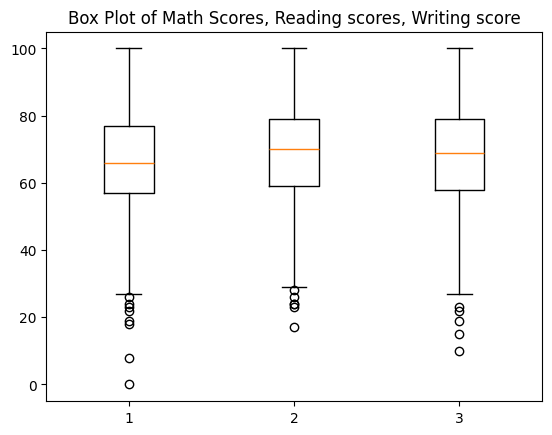

In [30]:
plt.boxplot(df[['math score','reading score','writing score']])
plt.title('Box Plot of Math Scores, Reading scores, Writing score')
plt.show()

-1.404682676015657

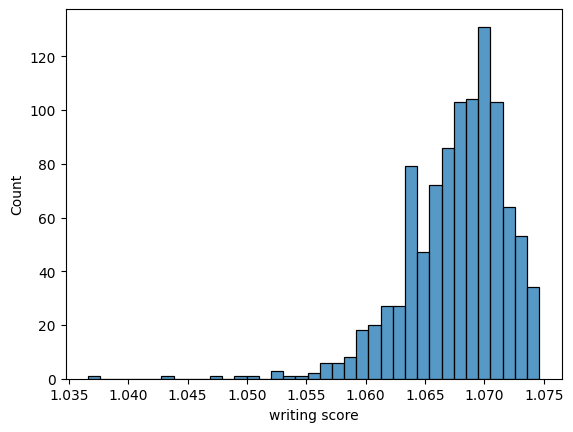

In [36]:
df['writing score']=np.sqrt(df['writing score'])
sns.histplot(df['writing score'])
df['writing score'].skew()

<Axes: >

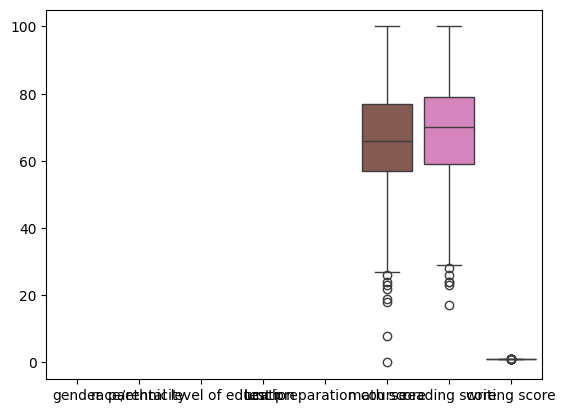

In [37]:
sns.boxplot(df)

<Axes: >

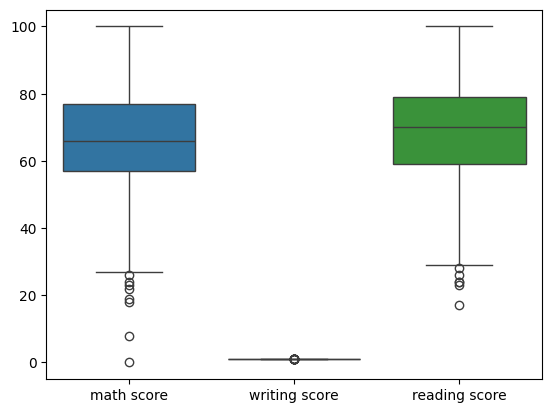

In [38]:
sns.boxplot(df[['math score','writing score','reading score']])